## Tugas 1
Nama: Daffa Zimraan Hassan <br/>
NRP : 5025221223 <br/><br/>
Tugas Implementasi Metode RNN dan Variannya untuk melakukan prediksi nilai tukar Rupiah terhadap salah satu mata uang asing sesuai dataset berikut https://satudata.kemendag.go.id/data-informasi/perdagangan-dalam-negeri/nilai-tukar

Data training: Januari 2001 – Desember 2023, Data testing: Januari 2024 – Januari 2025

Catatan Revisi:
1. Mencoba skenario yang berbeda-beda untuk menguji model
2. Memberi analisis mendalam dan penjelasan di akhir tentang percobaan yg sudah dilakukan. Misal = GRU menunjukkan hasil yg lebih maksimal dikarenakan arsitektur GRU .... terhadap dataset yang mempengaruhi ...., dst.
3. Memberi gambar hasil komparasi prediction vs ground truth
4. Analisis loss.
'

# Load Data

In [ ]:
import pandas as pd

df = pd.read_csv('archive/Dataset.csv')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df.head()

,Tahun,USD,JPY,DEM,NLG,GBP,FRH,CHF,SGD,MYR,HKD,AUD,CAD
0,2025,0,0,0,0,0,0,0,0,0,0,0,0
1,Januari,"16,259.00","10,523.63",0,0,"20,245.72",0,"17,938.99","12,045.96","3,701.14","2,086.94","10,117.19","11,276.50"
2,2024,0,0,0,0,0,0,0,0,0,0,0,0
3,Desember,"16,162.00","10,236.25",0,0,"20,332.61",0,"17,920.95","11,919.34","3,616.48","2,082.02","10,081.88","11,225.18"
4,November,"15,864.00","10,453.01",0,0,"20,067.98",0,"17,944.72","11,805.79","3,566.56","2,038.59","10,283.06","11,310.03"


In [ ]:
df.tail()

,Tahun,USD,JPY,DEM,NLG,GBP,FRH,CHF,SGD,MYR,HKD,AUD,CAD
314,2000,"9,595.00","8,357.30","4,556.63","4,044.04","14,299.45","1,358.60","5,859.55","5,539.05","2,525.01","5,318.53",460.26,"6,389.01"
315,1999,"7,100.00","6,947.09","3,654.56","3,243.45","11,494.92","1,089.64","4,449.88","4,260.43","1,868.42","4,622.12",369.15,"4,886.28"
316,1998,"8,025.00","7,000.49","4,776.93","4,239.64","13,335.97","1,424.27","5,806.82","4,835.80","2,111.82","4,923.36",482.45,"5,182.11"
317,1997,"4,650.00","3,578.31","2,597.77","2,305.87","7,708.79",776.35,"3,196.98","2,772.83","1,198.47","3,039.94",264.36,"3,246.87"
318,1996,"2,383.00","2,058.39","1,535.98","1,368.17","4,036.98",456.27,"1,772.87","1,704.97",943.77,"1,902.92",156.15,"1,745.33"


# Cleaning Data

In [ ]:
# Drop data dari tahun 1996 - 2000 karena tidak terpakai
df = df.iloc[:-5]
df.tail()

,Tahun,USD,JPY,DEM,NLG,GBP,FRH,CHF,SGD,MYR,HKD,AUD,CAD
309,Mei,"11,058.00","9,217.33","4,838.38","4,294.10","15,764.86","1,442.61","6,210.98","6,114.47","2,910.00","1,417.82","5,654.52","7,155.91"
310,April,"11,675.00","9,420.66","5,320.86","4,722.30","16,745.48","1,586.46","6,767.74","6,421.90","3,072.37","1,496.93","5,947.85","7,569.88"
311,Maret,"10,400.00","8,370.00","4,681.82","4,155.15","14,852.27","1,395.93","6,014.00","5,778.91","2,736.85","1,333.49","5,098.62","6,609.07"
312,Februari,"9,835.00","8,452.97","4,610.00","4,091.41","14,179.63","1,374.51","5,856.44","5,646.79","2,588.16","1,260.97","5,153.06","6,432.74"
313,Januari,"9,450.00","8,131.49","4,477.86","3,974.14","13,814.98","1,335.12","5,743.64","5,416.10","2,486.85","1,211.66","5,167.75","6,284.51"


In [ ]:
# karena hanya berfokus terhadap salah satu mata uang, maka drop kolom yang tidak diperlukan
df = df[['Tahun', 'AUD']] # Melakukan prediksi nilai tukar rupiah terhadap dolar australia
df.head()

,Tahun,AUD
0,2025,0
1,Januari,"10,117.19"
2,2024,0
3,Desember,"10,081.88"
4,November,"10,283.06"


In [ ]:
# Memperbaiki format tanggal dan tahun
cleaned_data = []
current_year = None

for index, row in df.iterrows():
    if isinstance(row.iloc[0], int):
        current_year = row.iloc[0]
    else:
        row_data = row.copy()
        row_data.iloc[0] = f"{row.iloc[0]} {current_year}"
        cleaned_data.append(row_data)

# Update dataframe
df = pd.DataFrame(cleaned_data, columns=df.columns)

# Konversi nilai dalam kolom dalam float
for col in df.columns[1:]:
    df[col] = df[col].astype(str).str.replace(',', '').astype(float)

# Reset index
df.reset_index(drop=True, inplace=True)

In [ ]:
# Mapping bulan dari bahasa Indonesia ke bahasa Inggris
month_mapping = {
    "Januari": "January", "Februari": "February", "Maret": "March", "April": "April",
    "Mei": "May", "Juni": "June", "Juli": "July", "Agustus": "August", "September": "September",
    "Oktober": "October", "November": "November", "Desember": "December"
}

# Mengganti nama bulan dari bahasa indonesia ke bahasa inggris
df['Tahun'] = df['Tahun'].replace(month_mapping, regex=True)
df.head()

,Tahun,AUD
0,January 2025,10117.19
1,December 2024,10081.88
2,November 2024,10283.06
3,October 2024,10319.41
4,September 2024,10417.22


In [ ]:
# Mengubah format bulan dan tahun menjadi time series
df['Tahun'] = pd.to_datetime(df['Tahun'], format='%B %Y')
df.set_index('Tahun', inplace=True)

# Memastikan index berurutan secara ascending order
df = df.sort_index()
df.head()

,AUD
Tahun,
2001-01-01,5167.75
2001-02-01,5153.06
2001-03-01,5098.62
2001-04-01,5947.85
2001-05-01,5654.52


# Preprocessed Data (Split dan Normalisasi Data)

In [ ]:
# Melakukan split dataset dengan training data dari january 2001 - december 2023 dan test data dari january 2024 - january 2025
train_data = df.loc['2001-01-01':'2023-12-01']
test_data = df.loc['2024-01-01':'2025-01-01']

# Cek apakah split sudah sesuai
print("Training Data Range:", train_data.index.min(), "to", train_data.index.max())
print("Test Data Range:", test_data.index.min(), "to", test_data.index.max())

overlap = train_data.index.intersection(test_data.index)
print("Overlap:", overlap)

print("Train Data Size:", len(train_data))
print("Test Data Size:", len(test_data))

Training Data Range: 2001-01-01 00:00:00 to 2023-12-01 00:00:00
Test Data Range: 2024-01-01 00:00:00 to 2025-01-01 00:00:00
Overlap: DatetimeIndex([], dtype='datetime64[ns]', name='Tahun', freq=None)
Train Data Size: 276
Test Data Size: 13


In [ ]:
# Normalisasi dengan min-max scaling
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
train_scaled = scaler.fit_transform(train_data)
test_scaled = scaler.transform(test_data)

# Cek apakah normalisasi sudah sesuai
print("Train Min:", train_scaled.min(), "Train Max:", train_scaled.max())
print("Test Min:", test_scaled.min(), "Test Max:", test_scaled.max())

Train Min: 0.0 Train Max: 1.0
Test Min: 0.8188352425416843 Test Max: 0.9501870416789804


In [ ]:
# Membuat sequences untuk RNN
import numpy as np

sequence_length = 6

def create_sequences(data, seq_length):
    X, y = [], []
    for i in range(len(data) - seq_length):
        X.append(data[i:i + seq_length])
        y.append(data[i + seq_length])
    return np.array(X), np.array(y)

X_train, y_train = create_sequences(train_scaled, sequence_length)

X_test, y_test = create_sequences(test_scaled, sequence_length)

# Cek apakah sequences sudah sesuai
print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)
print("X_test shape:", X_test.shape)
print("y_test shape:", y_test.shape)

X_train shape: (270, 6, 1)
y_train shape: (270, 1)
X_test shape: (7, 6, 1)
y_test shape: (7, 1)


# Implementasi Simple RNN

## Skenario 1: Tanpa implementasi Early Stopping


In [ ]:
# Import library yang dibutuhkan
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN, Dense, LSTM, GRU

In [ ]:
# Define untuk model simple RNN
model = Sequential([
    SimpleRNN(50, activation='relu', return_sequences=True, input_shape=(6, 1)),  # RNN layer
    SimpleRNN(50, activation='relu'),  # Another RNN layer
    Dense(25, activation='relu'),  # Fully connected layer
    Dense(1)  # Output layer (prediksi exchange rate)
])

model.compile(optimizer='adam', loss='mse')

model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ simple_rnn (SimpleRNN)               │ (None, 6, 50)               │           2,600 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ simple_rnn_1 (SimpleRNN)             │ (None, 50)                  │           5,050 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 25)                  │           1,275 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │              26 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 8,951 (34.96 KB)

 Trainable params: 8,951 (34.96 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# Melakukan train terhadap model
history = model.fit(X_train, y_train, epochs=50, batch_size=16, validation_data=(X_test, y_test))


Epoch 1/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 4s 34ms/step - loss: 0.1116 - val_loss: 0.0103
Epoch 2/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0114 - val_loss: 0.0011
Epoch 3/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0035 - val_loss: 0.0023
Epoch 4/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0024 - val_loss: 0.0015
Epoch 5/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0027 - val_loss: 7.7350e-04
Epoch 6/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0022 - val_loss: 4.7856e-04
Epoch 7/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0020 - val_loss: 0.0034
Epoch 8/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0024 - val_loss: 6.8073e-04
Epoch 9/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0025 - val_loss: 0.0020
Epoch 10/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0023 - val_loss: 3.4050e-04
Epoch 11/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0019 - val_loss: 7.5275e-04
Epoch 12/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - 

In [ ]:
# Mengevaluasi Loss
train_loss = model.evaluate(X_train, y_train)
test_loss = model.evaluate(X_test, y_test)
print(f"Train Loss: {train_loss}, Test Loss: {test_loss}")

9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0016     
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step - loss: 2.6681e-04
Train Loss: 0.0017737565794959664, Test Loss: 0.0002668071538209915


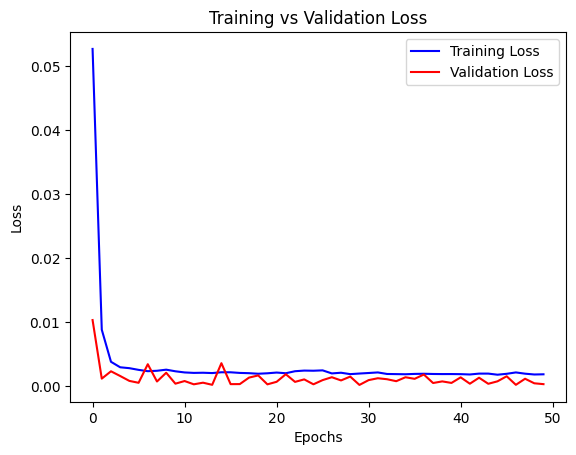

In [ ]:
# Loss Plot
import matplotlib.pyplot as plt

plt.plot(history.history['loss'], label='Training Loss', color='blue')
plt.plot(history.history['val_loss'], label='Validation Loss', color='red')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('Training vs Validation Loss')
plt.show()

In [ ]:
# Membuat prediksi
train_pred = model.predict(X_train)
test_pred = model.predict(X_test)

# Inverse transformasi menuju skala original
train_pred = scaler.inverse_transform(train_pred)
test_pred = scaler.inverse_transform(test_pred)
y_train_orig = scaler.inverse_transform(y_train.reshape(-1, 1))
y_test_orig = scaler.inverse_transform(y_test.reshape(-1, 1))

9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step


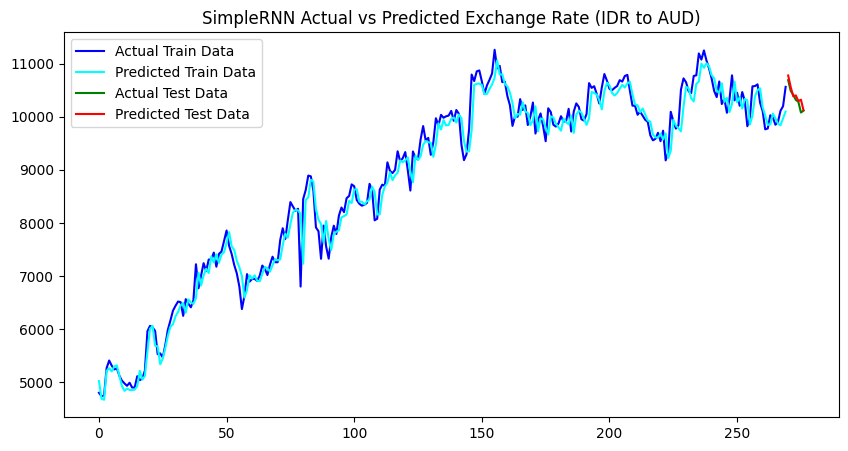

In [ ]:
# plot result
plt.figure(figsize=(10, 5))
plt.plot(y_train_orig, label="Actual Train Data", color='blue')
plt.plot(train_pred, label="Predicted Train Data", color='cyan')

plt.plot(range(len(y_train), len(y_train) + len(y_test_orig)), y_test_orig, label="Actual Test Data", color='green')
plt.plot(range(len(y_train), len(y_train) + len(test_pred)), test_pred, label="Predicted Test Data", color='red')

plt.legend()
plt.title("SimpleRNN Actual vs Predicted Exchange Rate (IDR to AUD)")
plt.show()

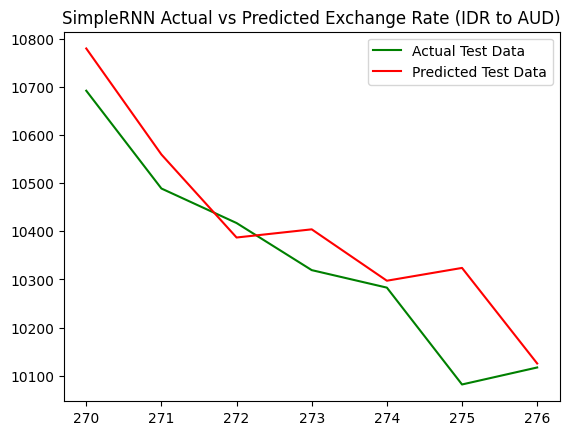

In [ ]:
plt.plot(range(len(y_train), len(y_train) + len(y_test_orig)), y_test_orig, label="Actual Test Data", color='green')
plt.plot(range(len(y_train), len(y_train) + len(test_pred)), test_pred, label="Predicted Test Data", color='red')
plt.legend()
plt.title("SimpleRNN Actual vs Predicted Exchange Rate (IDR to AUD)")
plt.show()

In [ ]:
# Print all actual vs. predicted test values
for i in range(len(y_test_orig)):
    print(f"Actual: {y_test_orig[i][0]:.2f}, Predicted: {test_pred[i][0]:.2f}")

Actual: 10692.06, Predicted: 10779.79
Actual: 10488.92, Predicted: 10559.57
Actual: 10417.22, Predicted: 10387.15
Actual: 10319.41, Predicted: 10404.11
Actual: 10283.06, Predicted: 10297.40
Actual: 10081.88, Predicted: 10323.98
Actual: 10117.19, Predicted: 10125.51


In [ ]:
# Matriks Performa
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

mae = mean_absolute_error(y_test_orig, test_pred)
rmse = np.sqrt(mean_squared_error(y_test_orig, test_pred))
mape = np.mean(np.abs((y_test_orig - test_pred) / y_test_orig)) * 100
r2 = r2_score(y_test_orig, test_pred)

print(f"MAE: {mae:.2f}")
print(f"RMSE: {rmse:.2f}")
print(f"MAPE: {mape:.2f}%")
print(f"R² Score: {r2:.2f}")

MAE: 76.85
RMSE: 106.67
MAPE: 0.75%
R² Score: 0.71


## Skenario 2: Implementasi Early Stopping

In [ ]:
# Import library yang dibutuhkan
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN, Dense, LSTM, GRU

In [ ]:
# Define untuk model simple RNN
model = Sequential([
    SimpleRNN(50, activation='relu', return_sequences=True, input_shape=(6, 1)),  # RNN layer
    SimpleRNN(50, activation='relu'),  # Another RNN layer
    Dense(25, activation='relu'),  # Fully connected layer
    Dense(1)  # Output layer (prediksi exchange rate)
])

model.compile(optimizer='adam', loss='mse')

model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ simple_rnn_2 (SimpleRNN)             │ (None, 6, 50)               │           2,600 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ simple_rnn_3 (SimpleRNN)             │ (None, 50)                  │           5,050 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 25)                  │           1,275 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 1)                   │              26 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 8,951 (34.96 KB)

 Trainable params: 8,951 (34.96 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# Melakukan train terhadap model
from tensorflow.keras.callbacks import EarlyStopping
early_stop = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

history_rnn = model.fit(X_train, y_train, epochs=50, batch_size=16, validation_data=(X_test, y_test), callbacks=[early_stop])


Epoch 1/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 3s 52ms/step - loss: 0.3845 - val_loss: 0.1930
Epoch 2/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0648 - val_loss: 0.0055
Epoch 3/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0062 - val_loss: 7.0380e-04
Epoch 4/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0041 - val_loss: 0.0027
Epoch 5/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0030 - val_loss: 0.0012
Epoch 6/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0023 - val_loss: 0.0010
Epoch 7/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0028 - val_loss: 3.6751e-04
Epoch 8/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0028 - val_loss: 0.0043
Epoch 9/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.0028 - val_loss: 0.0013
Epoch 10/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0023 - val_loss: 1.1589e-04
Epoch 11/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0023 - val_loss: 1.2665e-04
Epoch 12/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/st

In [ ]:
# Mengevaluasi Loss
train_loss = model.evaluate(X_train, y_train)
test_loss = model.evaluate(X_test, y_test)
print(f"Train Loss: {train_loss}, Test Loss: {test_loss}")

9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0023 
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - loss: 1.1589e-04
Train Loss: 0.0023871988523751497, Test Loss: 0.00011589057248784229


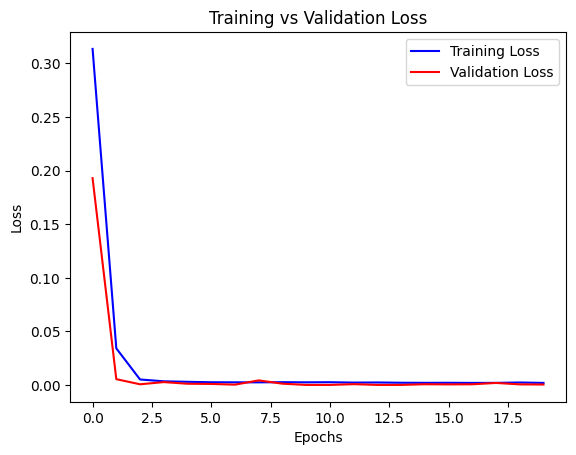

In [ ]:
# Loss Plot
plt.plot(history_rnn.history['loss'], label='Training Loss', color='blue')
plt.plot(history_rnn.history['val_loss'], label='Validation Loss', color='red')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('Training vs Validation Loss')
plt.show()

In [ ]:
# Membuat prediksi
train_pred = model.predict(X_train)
test_pred = model.predict(X_test)

# Inverse transformasi menuju skala original
train_pred = scaler.inverse_transform(train_pred)
test_pred = scaler.inverse_transform(test_pred)
y_train_orig = scaler.inverse_transform(y_train.reshape(-1, 1))
y_test_orig = scaler.inverse_transform(y_test.reshape(-1, 1))

9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step


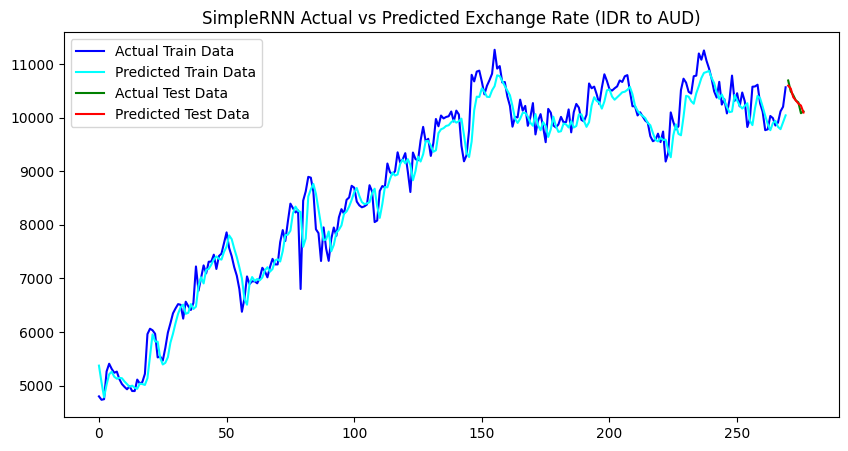

In [ ]:
# plot result
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))
plt.plot(y_train_orig, label="Actual Train Data", color='blue')
plt.plot(train_pred, label="Predicted Train Data", color='cyan')

plt.plot(range(len(y_train), len(y_train) + len(y_test_orig)), y_test_orig, label="Actual Test Data", color='green')
plt.plot(range(len(y_train), len(y_train) + len(test_pred)), test_pred, label="Predicted Test Data", color='red')

plt.legend()
plt.title("SimpleRNN Actual vs Predicted Exchange Rate (IDR to AUD)")
plt.show()


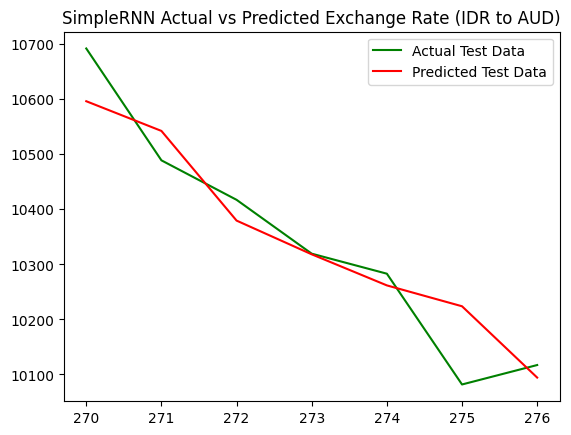

In [ ]:
plt.plot(range(len(y_train), len(y_train) + len(y_test_orig)), y_test_orig, label="Actual Test Data", color='green')
plt.plot(range(len(y_train), len(y_train) + len(test_pred)), test_pred, label="Predicted Test Data", color='red')
plt.legend()
plt.title("SimpleRNN Actual vs Predicted Exchange Rate (IDR to AUD)")
plt.show()

In [ ]:
# Print all actual vs. predicted test values
for i in range(len(y_test_orig)):
    print(f"Actual: {y_test_orig[i][0]:.2f}, Predicted: {test_pred[i][0]:.2f}")

Actual: 10692.06, Predicted: 10596.26
Actual: 10488.92, Predicted: 10542.34
Actual: 10417.22, Predicted: 10379.50
Actual: 10319.41, Predicted: 10318.24
Actual: 10283.06, Predicted: 10261.82
Actual: 10081.88, Predicted: 10223.91
Actual: 10117.19, Predicted: 10094.41


In [ ]:
# Matriks Performa
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

mae = mean_absolute_error(y_test_orig, test_pred)
rmse = np.sqrt(mean_squared_error(y_test_orig, test_pred))
mape = np.mean(np.abs((y_test_orig - test_pred) / y_test_orig)) * 100
r2 = r2_score(y_test_orig, test_pred)

print(f"MAE: {mae:.2f}")
print(f"RMSE: {rmse:.2f}")
print(f"MAPE: {mape:.2f}%")
print(f"R² Score: {r2:.2f}")

MAE: 53.45
RMSE: 70.30
MAPE: 0.52%
R² Score: 0.87


## Analisis SimpleRNN
- Berdasarkan matriks performa, SimpleRNN Skenario 2 sedikit lebih akurat daripada skenario 1 dikarenakan penggunaan early stopping mencegah overfitting dengan menghentikan training ketika kinerja model pada validation set berhenti meningkat.
- SimpleRNN juga memiliki nilai kesalahan terendah (MAE, RMSE, MAPE) di antara dua model yang lain yaitu LSTM dan GRU.
- Nilai R² sebesar 0,89 menunjukkan bahwa model ini menjelaskan sebagian besar varians dalam data.
- Hal ini menunjukkan bahwa model SimpleRNN sangat cocok dengan data prediksi nilai tukar IDR dengan AUD.

## Loss Analysis
- Pada skenario 2, dimulai dengan kerugian yang tinggi (0,2820) pada epoch pertama, kemudian menurun dengan cepat.
- Pada sekitar Epoch 11-12, kerugian pelatihan menjadi stabil di dekat 0,0022, dan kerugian validasi juga turun ke nilai yang sangat rendah (turun ke 1,0338e-04 pada satu titik).
- Konvergensi yang cepat dan nilai kerugian yang rendah secara konsisten pada set training dan validation menunjukkan bahwa SimpleRNN mempelajari pola-pola yang mendasarinya secara efektif tanpa overfitting yang jelas.

# Implementasi LSTM

## Skenario 1: Tanpa Implementasi Dropout dan Early Stopping

In [ ]:
# Define the LSTM Model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

model = Sequential([
    LSTM(100, return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2])),
    LSTM(100, return_sequences=False),
    Dense(1)
])

model.compile(optimizer='adam', loss='mse')

model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                          │ (None, 6, 100)              │          40,800 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_1 (LSTM)                        │ (None, 100)                 │          80,400 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 1)                   │             101 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 121,301 (473.83 KB)

 Trainable params: 121,301 (473.83 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# Melakukan train terhadap model
history = model.fit(X_train, y_train, epochs=50, batch_size=16, validation_data=(X_test, y_test))

Epoch 1/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 4s 39ms/step - loss: 0.2706 - val_loss: 0.0065
Epoch 2/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 0.0144 - val_loss: 0.0076
Epoch 3/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0090 - val_loss: 0.0013
Epoch 4/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.0058 - val_loss: 0.0010
Epoch 5/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.0036 - val_loss: 0.0019
Epoch 6/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.0035 - val_loss: 0.0030
Epoch 7/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0034 - val_loss: 0.0037
Epoch 8/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 0.0040 - val_loss: 0.0025
Epoch 9/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 0.0036 - val_loss: 0.0048
Epoch 10/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 0.0037 - val_loss: 0.0035
Epoch 11/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 0.0035 - val_loss: 0.0028
Epoch 12/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 0.0

In [ ]:
# Mengevaluasi Loss
train_loss = model.evaluate(X_train, y_train)
test_loss = model.evaluate(X_test, y_test)
print(f"Train Loss: {train_loss}, Test Loss: {test_loss}")

9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0037 
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step - loss: 7.3525e-04
Train Loss: 0.003406737931072712, Test Loss: 0.0007352481479756534


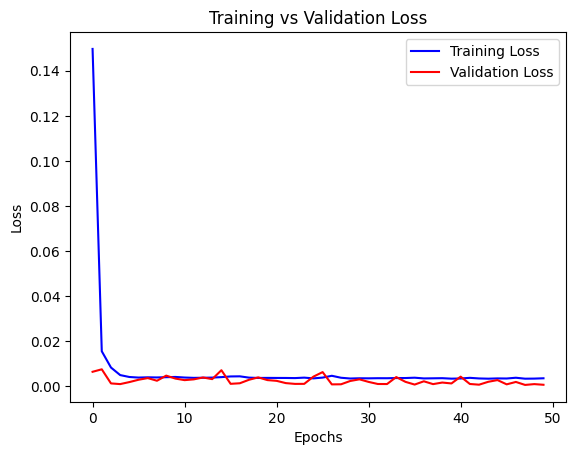

In [ ]:
# Loss Plot
plt.plot(history.history['loss'], label='Training Loss', color='blue')
plt.plot(history.history['val_loss'], label='Validation Loss', color='red')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('Training vs Validation Loss')
plt.show()

In [ ]:
# Membuat prediksi
train_pred = model.predict(X_train)
test_pred = model.predict(X_test)

# Denormalisasi
train_pred = scaler.inverse_transform(train_pred)
test_pred = scaler.inverse_transform(test_pred)
y_train_orig = scaler.inverse_transform(y_train.reshape(-1, 1))
y_test_orig = scaler.inverse_transform(y_test.reshape(-1, 1))

9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 61ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step


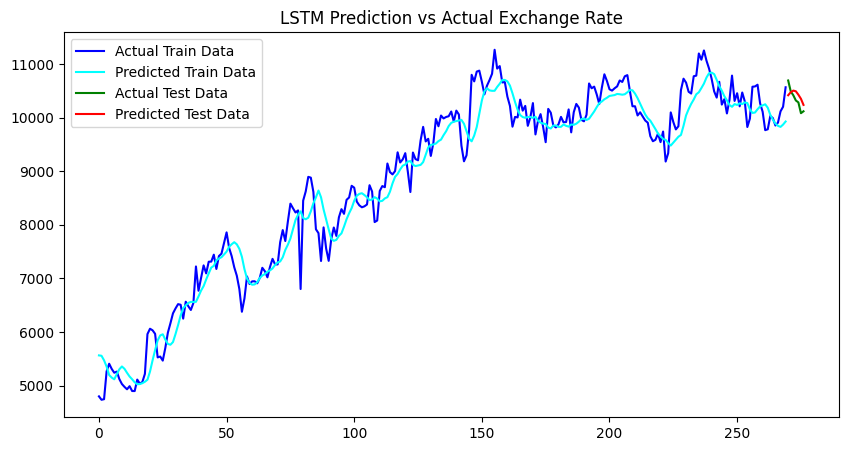

In [ ]:
# Membuat Plot Visualisasi

plt.figure(figsize=(10, 5))
plt.plot(y_train_orig, label="Actual Train Data", color='blue')
plt.plot(train_pred, label="Predicted Train Data", color='cyan')
plt.plot(range(len(y_train), len(y_train) + len(y_test_orig)), y_test_orig, label="Actual Test Data", color='green')
plt.plot(range(len(y_train), len(y_train) + len(test_pred)), test_pred, label="Predicted Test Data", color='red')
plt.legend()
plt.title("LSTM Prediction vs Actual Exchange Rate")
plt.show()

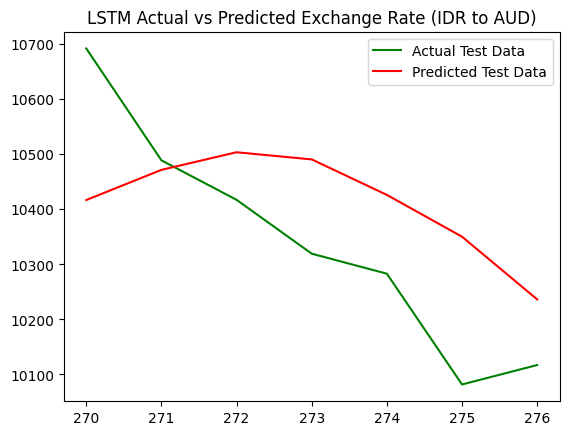

In [ ]:
plt.plot(range(len(y_train), len(y_train) + len(y_test_orig)), y_test_orig, label="Actual Test Data", color='green')
plt.plot(range(len(y_train), len(y_train) + len(test_pred)), test_pred, label="Predicted Test Data", color='red')
plt.legend()
plt.title("LSTM Actual vs Predicted Exchange Rate (IDR to AUD)")
plt.show()

In [ ]:
# Print all actual vs. predicted test values
for i in range(len(y_test_orig)):
    print(f"Actual: {y_test_orig[i][0]:.2f}, Predicted: {test_pred[i][0]:.2f}")

Actual: 10692.06, Predicted: 10416.85
Actual: 10488.92, Predicted: 10471.60
Actual: 10417.22, Predicted: 10503.59
Actual: 10319.41, Predicted: 10490.61
Actual: 10283.06, Predicted: 10426.16
Actual: 10081.88, Predicted: 10350.22
Actual: 10117.19, Predicted: 10236.39


In [ ]:
# Matriks Performa
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

mae = mean_absolute_error(y_test_orig, test_pred)
rmse = np.sqrt(mean_squared_error(y_test_orig, test_pred))
mape = np.mean(np.abs((y_test_orig - test_pred) / y_test_orig)) * 100
r2 = r2_score(y_test_orig, test_pred)

print(f"MAE: {mae:.2f}")
print(f"RMSE: {rmse:.2f}")
print(f"MAPE: {mape:.2f}%")
print(f"R² Score: {r2:.2f}")

MAE: 154.39
RMSE: 177.08
MAPE: 1.49%
R² Score: 0.19


## Skenario 2: Implementasi Dropout Tanpa Early Stopping

In [ ]:
# Define the LSTM Model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout

model = Sequential([
    LSTM(100, return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2])),
    Dropout(0.2),
    LSTM(100, return_sequences=False),
    Dropout(0.2),
    Dense(1)
])

model.compile(optimizer='adam', loss='mse')

model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_2 (LSTM)                        │ (None, 6, 100)              │          40,800 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 6, 100)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_3 (LSTM)                        │ (None, 100)                 │          80,400 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 100)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 1)                   │             101 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 121,301 (473.83 KB)

 Trainable params: 121,301 (473.83 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# Melakukan train terhadap model
history = model.fit(X_train, y_train, epochs=50, batch_size=16, validation_data=(X_test, y_test))

Epoch 1/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 4s 40ms/step - loss: 0.2644 - val_loss: 0.0014
Epoch 2/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0126 - val_loss: 0.0131
Epoch 3/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0131 - val_loss: 0.0012
Epoch 4/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0087 - val_loss: 0.0011
Epoch 5/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.0076 - val_loss: 0.0016
Epoch 6/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0068 - val_loss: 0.0019
Epoch 7/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.0059 - val_loss: 0.0041
Epoch 8/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0070 - val_loss: 0.0032
Epoch 9/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0067 - val_loss: 0.0014
Epoch 10/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0050 - val_loss: 0.0010
Epoch 11/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.0064 - val_loss: 0.0015
Epoch 12/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0

In [ ]:
# Mengevaluasi Loss
train_loss = model.evaluate(X_train, y_train)
test_loss = model.evaluate(X_test, y_test)
print(f"Train Loss: {train_loss}, Test Loss: {test_loss}")

9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0046 
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step - loss: 0.0015
Train Loss: 0.005044293589890003, Test Loss: 0.0014618884306401014


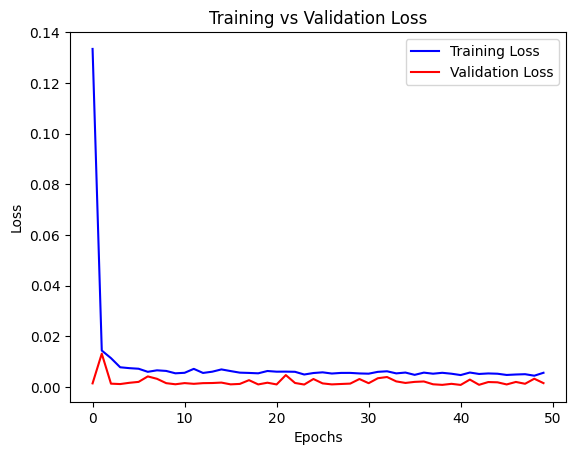

In [ ]:
plt.plot(history.history['loss'], label='Training Loss', color='blue')
plt.plot(history.history['val_loss'], label='Validation Loss', color='red')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('Training vs Validation Loss')
plt.show()

In [ ]:
# Membuat prediksi
train_pred = model.predict(X_train)
test_pred = model.predict(X_test)

# Denormalisasi
train_pred = scaler.inverse_transform(train_pred)
test_pred = scaler.inverse_transform(test_pred)
y_train_orig = scaler.inverse_transform(y_train.reshape(-1, 1))
y_test_orig = scaler.inverse_transform(y_test.reshape(-1, 1))

9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step


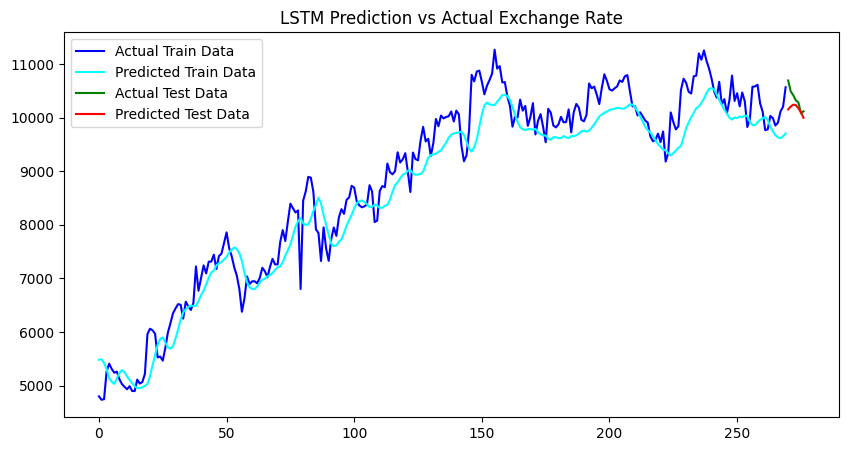

In [ ]:
# Membuat Plot Visualisasi

plt.figure(figsize=(10, 5))
plt.plot(y_train_orig, label="Actual Train Data", color='blue')
plt.plot(train_pred, label="Predicted Train Data", color='cyan')
plt.plot(range(len(y_train), len(y_train) + len(y_test_orig)), y_test_orig, label="Actual Test Data", color='green')
plt.plot(range(len(y_train), len(y_train) + len(test_pred)), test_pred, label="Predicted Test Data", color='red')
plt.legend()
plt.title("LSTM Prediction vs Actual Exchange Rate")
plt.show()

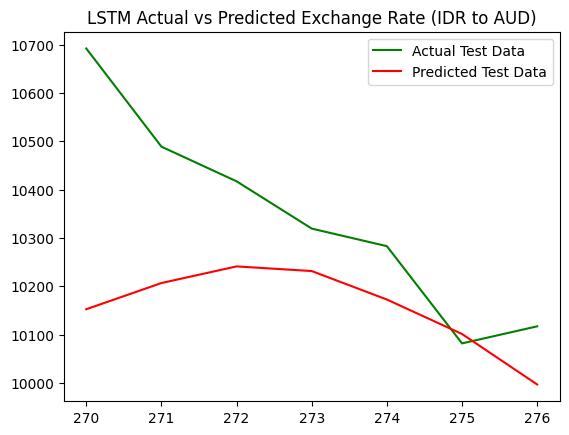

In [ ]:
plt.plot(range(len(y_train), len(y_train) + len(y_test_orig)), y_test_orig, label="Actual Test Data", color='green')
plt.plot(range(len(y_train), len(y_train) + len(test_pred)), test_pred, label="Predicted Test Data", color='red')
plt.legend()
plt.title("LSTM Actual vs Predicted Exchange Rate (IDR to AUD)")
plt.show()

In [ ]:
# Print all actual vs. predicted test values
for i in range(len(y_test_orig)):
    print(f"Actual: {y_test_orig[i][0]:.2f}, Predicted: {test_pred[i][0]:.2f}")

Actual: 10692.06, Predicted: 10152.56
Actual: 10488.92, Predicted: 10206.75
Actual: 10417.22, Predicted: 10241.16
Actual: 10319.41, Predicted: 10231.55
Actual: 10283.06, Predicted: 10172.64
Actual: 10081.88, Predicted: 10101.34
Actual: 10117.19, Predicted: 9996.88


In [ ]:
# Matriks Performa
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

mae = mean_absolute_error(y_test_orig, test_pred)
rmse = np.sqrt(mean_squared_error(y_test_orig, test_pred))
mape = np.mean(np.abs((y_test_orig - test_pred) / y_test_orig)) * 100
r2 = r2_score(y_test_orig, test_pred)

print(f"MAE: {mae:.2f}")
print(f"RMSE: {rmse:.2f}")
print(f"MAPE: {mape:.2f}%")
print(f"R² Score: {r2:.2f}")

MAE: 190.82
RMSE: 249.70
MAPE: 1.82%
R² Score: -0.60


## Skenario 3: Implementasi Dropout dan Early Stopping

In [ ]:
# Define the LSTM Model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout

model = Sequential([
    LSTM(100, return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2])),
    Dropout(0.2),
    LSTM(100, return_sequences=False),
    Dropout(0.2),
    Dense(1)
])

model.compile(optimizer='adam', loss='mse')

model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_4 (LSTM)                        │ (None, 6, 100)              │          40,800 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 6, 100)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_5 (LSTM)                        │ (None, 100)                 │          80,400 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 100)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 1)                   │             101 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 121,301 (473.83 KB)

 Trainable params: 121,301 (473.83 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# Melakukan train terhadap model
from tensorflow.keras.callbacks import EarlyStopping

early_stop = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
history_lstm = model.fit(X_train, y_train, epochs=50, batch_size=16, validation_data=(X_test, y_test), callbacks=[early_stop])

Epoch 1/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 5s 84ms/step - loss: 0.2646 - val_loss: 0.0019
Epoch 2/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - loss: 0.0142 - val_loss: 0.0058
Epoch 3/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 0.0098 - val_loss: 0.0011
Epoch 4/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0081 - val_loss: 0.0015
Epoch 5/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0075 - val_loss: 0.0012
Epoch 6/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.0065 - val_loss: 0.0014
Epoch 7/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.0062 - val_loss: 0.0032
Epoch 8/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0067 - val_loss: 0.0048


In [ ]:
# Mengevaluasi Loss
train_loss = model.evaluate(X_train, y_train)
test_loss = model.evaluate(X_test, y_test)
print(f"Train Loss: {train_loss}, Test Loss: {test_loss}")

9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0062 
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step - loss: 0.0011
Train Loss: 0.0047919475473463535, Test Loss: 0.001090721576474607


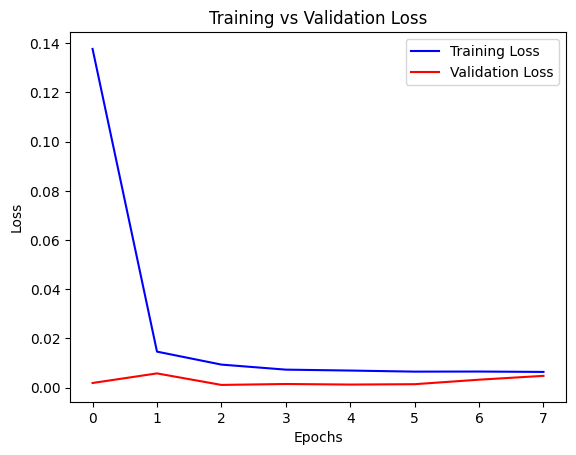

In [ ]:
plt.plot(history_lstm.history['loss'], label='Training Loss', color='blue')
plt.plot(history_lstm.history['val_loss'], label='Validation Loss', color='red')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('Training vs Validation Loss')
plt.show()

In [ ]:
# Membuat prediksi
train_pred = model.predict(X_train)
test_pred = model.predict(X_test)

# Denormalisasi
train_pred = scaler.inverse_transform(train_pred)
test_pred = scaler.inverse_transform(test_pred)
y_train_orig = scaler.inverse_transform(y_train.reshape(-1, 1))
y_test_orig = scaler.inverse_transform(y_test.reshape(-1, 1))


9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step


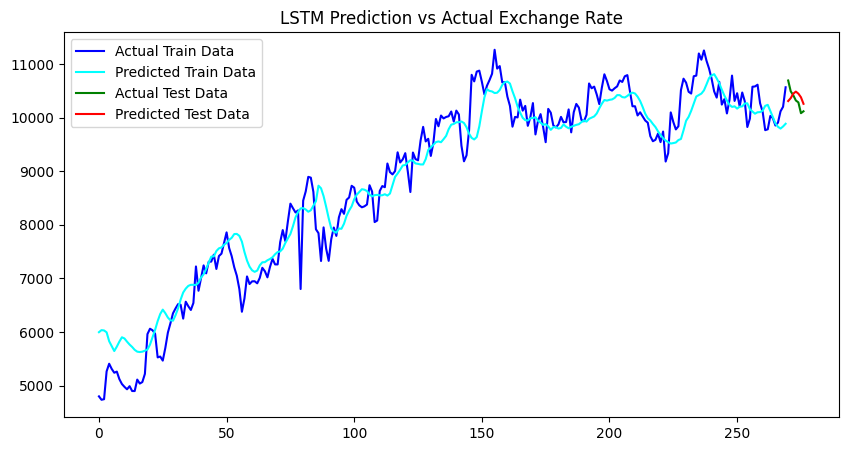

In [ ]:
# Membuat Plot Visualisasi

plt.figure(figsize=(10, 5))
plt.plot(y_train_orig, label="Actual Train Data", color='blue')
plt.plot(train_pred, label="Predicted Train Data", color='cyan')
plt.plot(range(len(y_train), len(y_train) + len(y_test_orig)), y_test_orig, label="Actual Test Data", color='green')
plt.plot(range(len(y_train), len(y_train) + len(test_pred)), test_pred, label="Predicted Test Data", color='red')
plt.legend()
plt.title("LSTM Prediction vs Actual Exchange Rate")
plt.show()


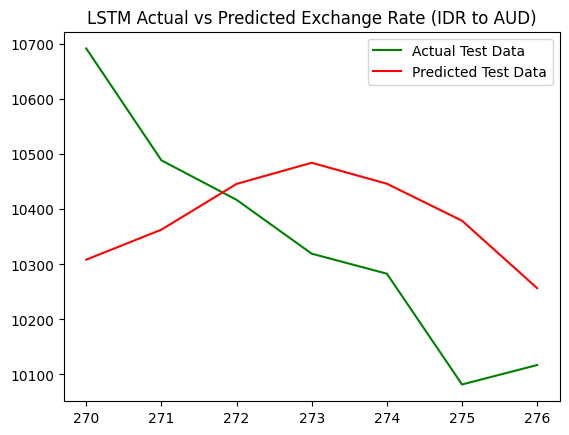

In [ ]:
plt.plot(range(len(y_train), len(y_train) + len(y_test_orig)), y_test_orig, label="Actual Test Data", color='green')
plt.plot(range(len(y_train), len(y_train) + len(test_pred)), test_pred, label="Predicted Test Data", color='red')
plt.legend()
plt.title("LSTM Actual vs Predicted Exchange Rate (IDR to AUD)")
plt.show()

In [ ]:
# Print all actual vs. predicted test values
for i in range(len(y_test_orig)):
    print(f"Actual: {y_test_orig[i][0]:.2f}, Predicted: {test_pred[i][0]:.2f}")

Actual: 10692.06, Predicted: 10308.56
Actual: 10488.92, Predicted: 10363.01
Actual: 10417.22, Predicted: 10446.09
Actual: 10319.41, Predicted: 10484.54
Actual: 10283.06, Predicted: 10446.46
Actual: 10081.88, Predicted: 10379.24
Actual: 10117.19, Predicted: 10256.76


In [ ]:
# Matriks Performa
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

mae = mean_absolute_error(y_test_orig, test_pred)
rmse = np.sqrt(mean_squared_error(y_test_orig, test_pred))
mape = np.mean(np.abs((y_test_orig - test_pred) / y_test_orig)) * 100
r2 = r2_score(y_test_orig, test_pred)

print(f"MAE: {mae:.2f}")
print(f"RMSE: {rmse:.2f}")
print(f"MAPE: {mape:.2f}%")
print(f"R² Score: {r2:.2f}")

MAE: 186.25
RMSE: 215.68
MAPE: 1.80%
R² Score: -0.20


## Analisis LSTM
- LSTM menunjukkan nilai kesalahan yang jauh lebih tinggi apabila dibandingkan dengan model-model lain seperti simpleRNN dan GRU.

- Nilai R² yang negatif menunjukkan bahwa model tersebut berkinerja buruk, bahkan mungkin lebih buruk daripada model dasar yang sederhana.

- Hasil ini dapat mengindikasikan masalah bahwa kemungkinan kompleksitas dataset tidak memerlukan atau tidak efektif menggunakan LSTM.

## Loss Analysis
- Pada skenario 3, dimulai dengan loss yang cukup tinggi (0.1630) tetapi menunjukkan penurunan yang signifikan pada epoch kedua (0.0213).

- Namun, loss training tampaknya sedikit berfluktuasi di sekitar 0,007, dan loss validation tidak secara konsisten menurun-mencapai serendah 0,0019 tetapi dengan peningkatan sesekali (misalnya, 0,0043).

- Meskipun model belajar dengan cepat pada awalnya, loss validation yang lebih tinggi dan tidak menentu menunjukkan bahwa LSTM mungkin kesusahan untuk menggeneralisasi dengan baik pada data yang tidak terlihat.

- Nilai loss secara keseluruhan jauh lebih tinggi dibandingkan dengan SimpleRNN, yang mengindikasikan bahwa model ini kurang efektif untuk dataset khusus ini.

# Implementasi GRU

## Skenario 1: Tanpa Implementasi Dropout dan Early Stopping

In [ ]:
# Define the GRU Model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import GRU, Dense

model = Sequential([
    GRU(50, return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2])),
    GRU(50, return_sequences=False),
    Dense(1)
])

model.compile(optimizer='adam', loss='mse')
model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ gru (GRU)                            │ (None, 6, 50)               │           7,950 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ gru_1 (GRU)                          │ (None, 50)                  │          15,300 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 1)                   │              51 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 23,301 (91.02 KB)

 Trainable params: 23,301 (91.02 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# Melakukan train terhadap model
history = model.fit(X_train, y_train, epochs=50, batch_size=16, validation_data=(X_test, y_test))

Epoch 1/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 4s 42ms/step - loss: 0.2714 - val_loss: 0.0454
Epoch 2/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 0.0264 - val_loss: 0.0152
Epoch 3/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0106 - val_loss: 0.0019
Epoch 4/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0058 - val_loss: 5.8349e-04
Epoch 5/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.0041 - val_loss: 5.4566e-04
Epoch 6/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0037 - val_loss: 0.0018
Epoch 7/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0034 - val_loss: 0.0011
Epoch 8/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0036 - val_loss: 0.0018
Epoch 9/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0034 - val_loss: 0.0015
Epoch 10/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 0.0034 - val_loss: 0.0013
Epoch 11/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0035 - val_loss: 6.3073e-04
Epoch 12/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step

In [ ]:
# Mengevaluasi Loss
train_loss = model.evaluate(X_train, y_train)
test_loss = model.evaluate(X_test, y_test)
print(f"Train Loss: {train_loss}, Test Loss: {test_loss}")

9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0028 
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step - loss: 0.0016
Train Loss: 0.002528159646317363, Test Loss: 0.0015966342762112617


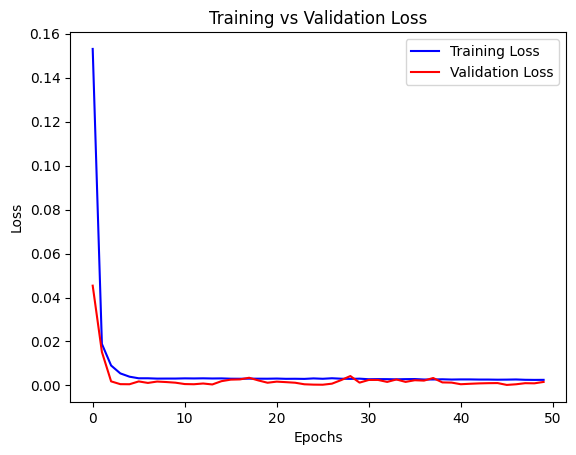

In [ ]:
plt.plot(history.history['loss'], label='Training Loss', color='blue')
plt.plot(history.history['val_loss'], label='Validation Loss', color='red')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('Training vs Validation Loss')
plt.show()

In [ ]:
# Membuat prediksi
train_pred = model.predict(X_train)
test_pred = model.predict(X_test)

# Denormalisasi
train_pred = scaler.inverse_transform(train_pred)
test_pred = scaler.inverse_transform(test_pred)
y_train_orig = scaler.inverse_transform(y_train.reshape(-1, 1))
y_test_orig = scaler.inverse_transform(y_test.reshape(-1, 1))

9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 67ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step


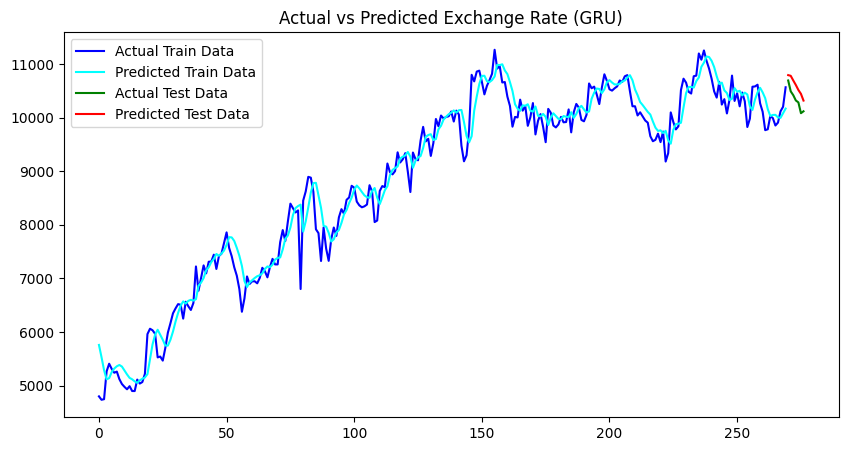

In [ ]:
# Plot Visualisasi

plt.figure(figsize=(10, 5))
plt.plot(y_train_orig, label="Actual Train Data", color='blue')
plt.plot(train_pred, label="Predicted Train Data", color='cyan')
plt.plot(range(len(y_train), len(y_train) + len(y_test_orig)), y_test_orig, label="Actual Test Data", color='green')
plt.plot(range(len(y_train), len(y_train) + len(test_pred)), test_pred, label="Predicted Test Data", color='red')
plt.legend()
plt.title("Actual vs Predicted Exchange Rate (GRU)")
plt.show()

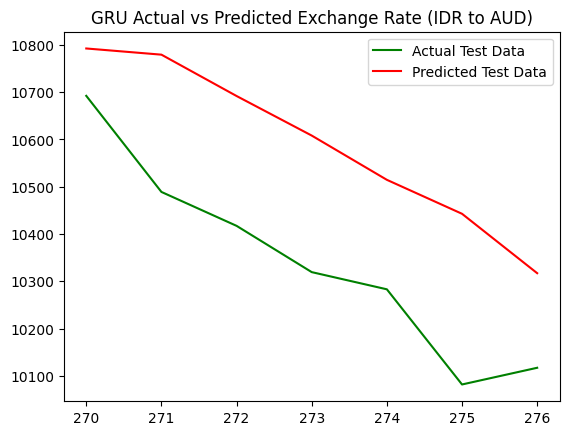

In [ ]:
plt.plot(range(len(y_train), len(y_train) + len(y_test_orig)), y_test_orig, label="Actual Test Data", color='green')
plt.plot(range(len(y_train), len(y_train) + len(test_pred)), test_pred, label="Predicted Test Data", color='red')
plt.legend()
plt.title("GRU Actual vs Predicted Exchange Rate (IDR to AUD)")
plt.show()

In [ ]:
# Print all actual vs. predicted test values
for i in range(len(y_test_orig)):
    print(f"Actual: {y_test_orig[i][0]:.2f}, Predicted: {test_pred[i][0]:.2f}")

Actual: 10692.06, Predicted: 10792.19
Actual: 10488.92, Predicted: 10779.12
Actual: 10417.22, Predicted: 10691.71
Actual: 10319.41, Predicted: 10608.07
Actual: 10283.06, Predicted: 10514.51
Actual: 10081.88, Predicted: 10442.72
Actual: 10117.19, Predicted: 10317.14


In [ ]:
# Matriks Performa
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

mae = mean_absolute_error(y_test_orig, test_pred)
rmse = np.sqrt(mean_squared_error(y_test_orig, test_pred))
mape = np.mean(np.abs((y_test_orig - test_pred) / y_test_orig)) * 100
r2 = r2_score(y_test_orig, test_pred)

print(f"MAE: {mae:.2f}")
print(f"RMSE: {rmse:.2f}")
print(f"MAPE: {mape:.2f}%")
print(f"R² Score: {r2:.2f}")

MAE: 249.39
RMSE: 260.95
MAPE: 2.42%
R² Score: -0.75


## Skenario 2: Implementasi Early Stopping

In [ ]:
# Define the GRU Model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import GRU, Dense


model = Sequential([
    GRU(50, return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2])),
    GRU(50, return_sequences=False),
    Dense(1)
])

model.compile(optimizer='adam', loss='mse')
model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ gru_2 (GRU)                          │ (None, 6, 50)               │           7,950 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ gru_3 (GRU)                          │ (None, 50)                  │          15,300 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_8 (Dense)                      │ (None, 1)                   │              51 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 23,301 (91.02 KB)

 Trainable params: 23,301 (91.02 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# Melakukan train terhadap model
from tensorflow.keras.callbacks import EarlyStopping

early_stop = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
history_gru = model.fit(X_train, y_train, epochs=50, batch_size=16, validation_data=(X_test, y_test), callbacks=[early_stop])

Epoch 1/50


In [ ]:
# Mengevaluasi Loss
train_loss = model.evaluate(X_train, y_train)
test_loss = model.evaluate(X_test, y_test)
print(f"Train Loss: {train_loss}, Test Loss: {test_loss}")

In [ ]:
# Loss Plot
plt.plot(history.history['loss'], label='Training Loss', color='blue')
plt.plot(history.history['val_loss'], label='Validation Loss', color='red')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('Training vs Validation Loss')
plt.show()

In [ ]:
# Membuat prediksi
train_pred = model.predict(X_train)
test_pred = model.predict(X_test)

# Denormalisasi
train_pred = scaler.inverse_transform(train_pred)
test_pred = scaler.inverse_transform(test_pred)
y_train_orig = scaler.inverse_transform(y_train.reshape(-1, 1))
y_test_orig = scaler.inverse_transform(y_test.reshape(-1, 1))

In [ ]:
# Plot Visualisasi

plt.figure(figsize=(10, 5))
plt.plot(y_train_orig, label="Actual Train Data", color='blue')
plt.plot(train_pred, label="Predicted Train Data", color='cyan')
plt.plot(range(len(y_train), len(y_train) + len(y_test_orig)), y_test_orig, label="Actual Test Data", color='green')
plt.plot(range(len(y_train), len(y_train) + len(test_pred)), test_pred, label="Predicted Test Data", color='red')
plt.legend()
plt.title("Actual vs Predicted Exchange Rate (GRU)")
plt.show()

In [ ]:
plt.plot(range(len(y_train), len(y_train) + len(y_test_orig)), y_test_orig, label="Actual Test Data", color='green')
plt.plot(range(len(y_train), len(y_train) + len(test_pred)), test_pred, label="Predicted Test Data", color='red')
plt.legend()
plt.title("GRU Actual vs Predicted Exchange Rate (IDR to AUD)")
plt.show()

In [ ]:
# Print all actual vs. predicted test values
for i in range(len(y_test_orig)):
    print(f"Actual: {y_test_orig[i][0]:.2f}, Predicted: {test_pred[i][0]:.2f}")

In [ ]:
# Matriks Performa
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

mae = mean_absolute_error(y_test_orig, test_pred)
rmse = np.sqrt(mean_squared_error(y_test_orig, test_pred))
mape = np.mean(np.abs((y_test_orig - test_pred) / y_test_orig)) * 100
r2 = r2_score(y_test_orig, test_pred)

print(f"MAE: {mae:.2f}")
print(f"RMSE: {rmse:.2f}")
print(f"MAPE: {mape:.2f}%")
print(f"R² Score: {r2:.2f}")

## Skenario 3: Adjust Learning Rate pada Skenario 2

In [ ]:
# Define the GRU Model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import GRU, Dense, Dropout
from tensorflow.keras.optimizers import Adam


model = Sequential([
    GRU(50, return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2])),
    GRU(50, return_sequences=False),
    Dense(1)
])

model.compile(optimizer=Adam(learning_rate=0.005), loss='mse')
model.summary()

In [ ]:
# Melakukan train terhadap model
from tensorflow.keras.callbacks import EarlyStopping

early_stop = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
history_gru = model.fit(X_train, y_train, epochs=50, batch_size=16, validation_data=(X_test, y_test), callbacks=[early_stop])

In [ ]:
# Mengevaluasi Loss
train_loss = model.evaluate(X_train, y_train)
test_loss = model.evaluate(X_test, y_test)
print(f"Train Loss: {train_loss}, Test Loss: {test_loss}")

In [ ]:
# Loss Plot
plt.plot(history_gru.history['loss'], label='Training Loss', color='blue')
plt.plot(history_gru.history['val_loss'], label='Validation Loss', color='red')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('Training vs Validation Loss')
plt.show()

In [ ]:
# Membuat prediksi
train_pred = model.predict(X_train)
test_pred = model.predict(X_test)

# Denormalisasi
train_pred = scaler.inverse_transform(train_pred)
test_pred = scaler.inverse_transform(test_pred)
y_train_orig = scaler.inverse_transform(y_train.reshape(-1, 1))
y_test_orig = scaler.inverse_transform(y_test.reshape(-1, 1))


In [ ]:
# Plot Visualisasi

plt.figure(figsize=(10, 5))
plt.plot(y_train_orig, label="Actual Train Data", color='blue')
plt.plot(train_pred, label="Predicted Train Data", color='cyan')
plt.plot(range(len(y_train), len(y_train) + len(y_test_orig)), y_test_orig, label="Actual Test Data", color='green')
plt.plot(range(len(y_train), len(y_train) + len(test_pred)), test_pred, label="Predicted Test Data", color='red')
plt.legend()
plt.title("Actual vs Predicted Exchange Rate (GRU)")
plt.show()


In [ ]:
plt.plot(range(len(y_train), len(y_train) + len(y_test_orig)), y_test_orig, label="Actual Test Data", color='green')
plt.plot(range(len(y_train), len(y_train) + len(test_pred)), test_pred, label="Predicted Test Data", color='red')
plt.legend()
plt.title("GRU Actual vs Predicted Exchange Rate (IDR to AUD)")
plt.show()

In [ ]:
# Print all actual vs. predicted test values
for i in range(len(y_test_orig)):
    print(f"Actual: {y_test_orig[i][0]:.2f}, Predicted: {test_pred[i][0]:.2f}")

In [ ]:
# Matriks Performa
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

mae = mean_absolute_error(y_test_orig, test_pred)
rmse = np.sqrt(mean_squared_error(y_test_orig, test_pred))
mape = np.mean(np.abs((y_test_orig - test_pred) / y_test_orig)) * 100
r2 = r2_score(y_test_orig, test_pred)

print(f"MAE: {mae:.2f}")
print(f"RMSE: {rmse:.2f}")
print(f"MAPE: {mape:.2f}%")
print(f"R² Score: {r2:.2f}")

## Analisis GRU
- Berdasarkan skenario-skenario yang sudah dibuat, dapat diketahui bahwa skenario 3 yang lebih optimal mektrik performanya karena penyesuaian learning rate dan penambahan early stopping.
- GRU berkinerja lebih baik daripada LSTM tetapi tidak mencapai metrik kesalahan rendah yang dicapai oleh SimpleRNN.
- R² sebesar 0.68 menunjukkan kecocokan yang baik, meskipun tidak sekuat SimpleRNN.

## Loss Analysis
- Pada skenario 3, Dimulai dengan loss yang relatif rendah (0,0917) dibandingkan dengan LSTM, dan dengan cepat mengurangi loss training dan validation.

- Loss training menyatu menjadi sekitar 0,0028-0,0035, sedangkan loss validation mencapai serendah 2,8821e-04.

- GRU menunjukkan konvergensi yang stabil dan relatif mulus, lebih baik daripada LSTM tetapi tidak cukup sesuai dengan nilai loss yang sangat rendah dari SimpleRNN.

- Hal ini menunjukkan bahwa meskipun GRU dapat menangkap dinamika dataset dengan cukup baik, profil kerugiannya menunjukkan bahwa GRU sedikit kurang efektif daripada SimpleRNN dalam skenario ini.


# Kesimpulan
- SimpleRNN mengungguli model LSTM dan GRU untuk set data ini. Model ini tidak hanya mencapai metrik kesalahan terendah (MAE, RMSE, MAPE) tetapi juga memiliki nilai R² tertinggi, yang mengindikasikan bahwa model ini menjelaskan sebagian besar varians dalam data. Hal ini dapat dikarenakan Kesederhanaan SimpleRNN yang menjadi keuntungan dalam kasus ini, menunjukkan bahwa dinamika yang mendasari nilai tukar rupiah terhadap AUD mungkin tidak memerlukan kompleksitas tambahan dari LSTM atau GRU.

- Sementara, LSTM tampaknya terlalu rumit atau tidak disetel secara efektif untuk dataset ini, sehingga menghasilkan kesalahan yang tinggi dan kecocokan yang buruk.

- Meskipun lebih baik daripada LSTM, GRU masih belum mencapai tingkat kinerja SimpleRNN. Sehingga berdasarkan pengamatan ini, SimpleRNN adalah model yang paling efektif dan akurat untuk dataset ini.
